In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import calendar
import datetime
import seaborn as sns

df = pd.read_csv("D:\\Data_Science\\Datasets\\Wather Data\\weather_data.csv", parse_dates = True, index_col = 'Date_Time')
df.head()

,Location,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
Date_Time,,,,,
2024-01-14 21:12:46,San Diego,10.683001,41.195754,4.020119,8.233540
2024-05-17 15:22:10,San Diego,8.734140,58.319107,9.111623,27.715161
2024-05-11 09:30:59,San Diego,11.632436,38.820175,4.607511,28.732951
2024-02-26 17:32:39,Philadelphia,-8.628976,54.074474,3.183720,26.367303
2024-04-29 13:23:51,San Antonio,39.808213,72.899908,9.598282,29.898622


In [2]:
# check the names of the column
df.columns

Index(['Location', 'Temperature_C', 'Humidity_pct', 'Precipitation_mm',
       'Wind_Speed_kmh'],
      dtype='object')

In [3]:
# check the size of the datasets
df.shape

(1000000, 5)

In [4]:
# check the basic information 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000000 entries, 2024-01-14 21:12:46 to 2024-04-16 16:11:52
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Location          1000000 non-null  object 
 1   Temperature_C     1000000 non-null  float64
 2   Humidity_pct      1000000 non-null  float64
 3   Precipitation_mm  1000000 non-null  float64
 4   Wind_Speed_kmh    1000000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 45.8+ MB


In [5]:
# Check the number of unique locations
df['Location'].unique()

array(['San Diego', 'Philadelphia', 'San Antonio', 'San Jose', 'New York',
       'Houston', 'Dallas', 'Chicago', 'Los Angeles', 'Phoenix'],
      dtype=object)

In [6]:
# lets check the statistical summary of the datsets
df.describe()

,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,14.779705,60.021830,5.109639,14.997598
std,14.482558,17.324022,2.947997,8.663556
min,-19.969311,30.000009,0.000009,0.000051
25%,2.269631,45.008500,2.580694,7.490101
50%,14.778002,60.018708,5.109917,14.993777
75%,27.270489,75.043818,7.613750,22.514110
max,39.999801,89.999977,14.971583,29.999973


In [7]:
# Find out the maximum temprature in each city
max_temp_each_city = df.groupby("Location")['Temperature_C'].max()
print(max_temp_each_city)

Location
Chicago         39.998561
Dallas          39.998804
Houston         39.998913
Los Angeles     39.999592
New York        39.999801
Philadelphia    39.999642
Phoenix         39.998889
San Antonio     39.998343
San Diego       39.999692
San Jose        39.999015
Name: Temperature_C, dtype: float64


In [8]:
# Find out the minimum temprature in each city
min_temp_each_city = df.groupby("Location")['Temperature_C'].min()
print(min_temp_each_city)

Location
Chicago         -9.999959
Dallas          -9.999588
Houston         -9.999874
Los Angeles     -9.999913
New York        -9.999870
Philadelphia    -9.999282
Phoenix        -19.969311
San Antonio     -9.999964
San Diego       -9.999986
San Jose        -9.999966
Name: Temperature_C, dtype: float64


In [10]:
# lets check the coolest temprature
df['Temperature_C'].min()

-19.96931109358452

In [11]:
# Check the coolest place from the datset
df.min()

Location              Chicago
Temperature_C      -19.969311
Humidity_pct        30.000009
Precipitation_mm     0.000009
Wind_Speed_kmh       0.000051
dtype: object

In [12]:
# Check the hotest place3 from the Dataset
df.max()

Location             San Jose
Temperature_C       39.999801
Humidity_pct        89.999977
Precipitation_mm    14.971583
Wind_Speed_kmh      29.999973
dtype: object

In [13]:
# check the correlation among the variable 
df.corr()

,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
Temperature_C,1.000000,-0.001344,-0.010876,-0.001273
Humidity_pct,-0.001344,1.000000,-0.000264,-0.000642
Precipitation_mm,-0.010876,-0.000264,1.000000,0.000981
Wind_Speed_kmh,-0.001273,-0.000642,0.000981,1.000000


### From above we can see that Precipitation and wind Speed are highly corelated with each other

#### Create a heatmap for above data 

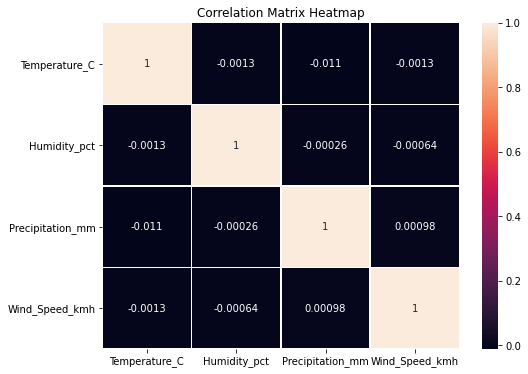

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot = True, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()